In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import math 
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

/Users/yashsolanki/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("GOOG.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-16,148.076996,148.551498,144.092499,144.838501,144.838501,27400000
1,2021-12-17,142.714493,144.460098,141.787994,142.802994,142.802994,43404000
2,2021-12-20,140.679596,142.610504,140.250000,142.401505,142.401505,20264000
3,2021-12-21,143.149994,144.692047,141.735001,144.220505,144.220505,19548000
4,2021-12-22,144.100006,147.302994,143.962997,146.949005,146.949005,18438000


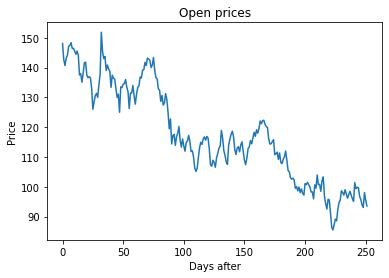

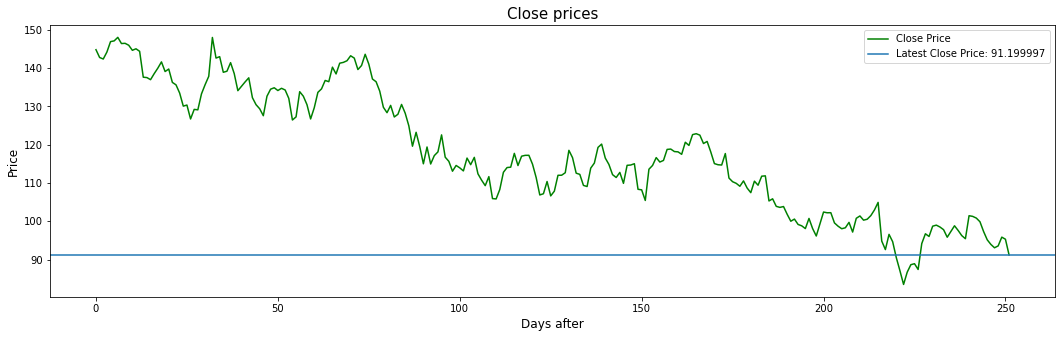

In [22]:
open_prices = df['Open']
close_prices = df['Close']

plt.title("Open prices")
plt.xlabel("Days after")
plt.ylabel("Price")
plt.plot(open_prices)
plt.show()


plt.figure(figsize=(18, 5))
plt.title("Close prices", fontsize=15)
plt.xlabel("Days after", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.plot(close_prices, 'g', label='Close Price')
plt.axhline(y=close_prices[len(close_prices) - 1], label=f'Latest Close Price: {close_prices[len(close_prices) - 1]}')
plt.legend()
plt.savefig("graphed-results/close-price")
plt.show()

In [5]:
len(close_prices)

252

## Applying indicators to predict the general trend of the stock 

## First Metric :- Relative Strength Index (RSI) 

Equation to compute the RSI of a stock 
RSI = 100 – (100 / [1 +RS])

Resource :- https://www.wallstreetmojo.com/relative-strength-index/

### Start

In [6]:
# Computing the losses and the gains 
close_prices = close_prices.to_list()

In [7]:
import pandas_ta as pta
relative_strength_indexs = pta.rsi(df['Close'], length = 14).to_list()

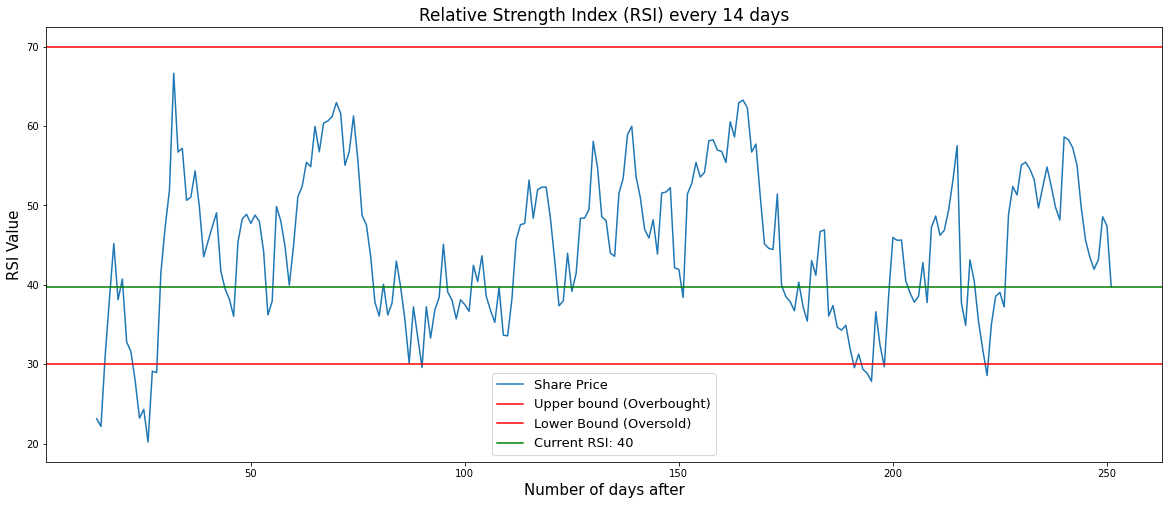

In [8]:
import matplotlib.pyplot as plt 
# %matplotlib notebook

plt.figure(figsize=(20, 8))
# plt.figure(figsize=(10, 5)) # This is when matplotlib notebook is activated
plt.plot(relative_strength_indexs, label='Share Price')
plt.axhline(y=70, color='r', label='Upper bound (Overbought)')
plt.axhline(y=30, color='r', label='Lower Bound (Oversold)')
plt.axhline(y=relative_strength_indexs[-1], color='g', label=f'Current RSI: {round(relative_strength_indexs[-1])}')
plt.title("Relative Strength Index (RSI) every 14 days", fontsize=17)
plt.xlabel("Number of days after", fontsize=15)
plt.ylabel("RSI Value", fontsize=15)
plt.legend(prop = {'size' : 13})
plt.savefig("graphed-results/RSI")
plt.show()

### End

## Creating Bollinger Bands

Simple Moving Average Equation + std 2

### start

In [9]:
import statistics

close_avg = df['Close'].rolling(5).mean()
standard_deviations = df['Close'].rolling(5).std()

upper_bollinger_band = []
lower_bollinger_band = []

for i in range(len(standard_deviations)):
    upper_bound = close_avg[i] + (standard_deviations[i] * 2)
    lower_bound = close_avg[i] - (standard_deviations[i] * 2)
    
    upper_bollinger_band.append(upper_bound)
    lower_bollinger_band.append(lower_bound)

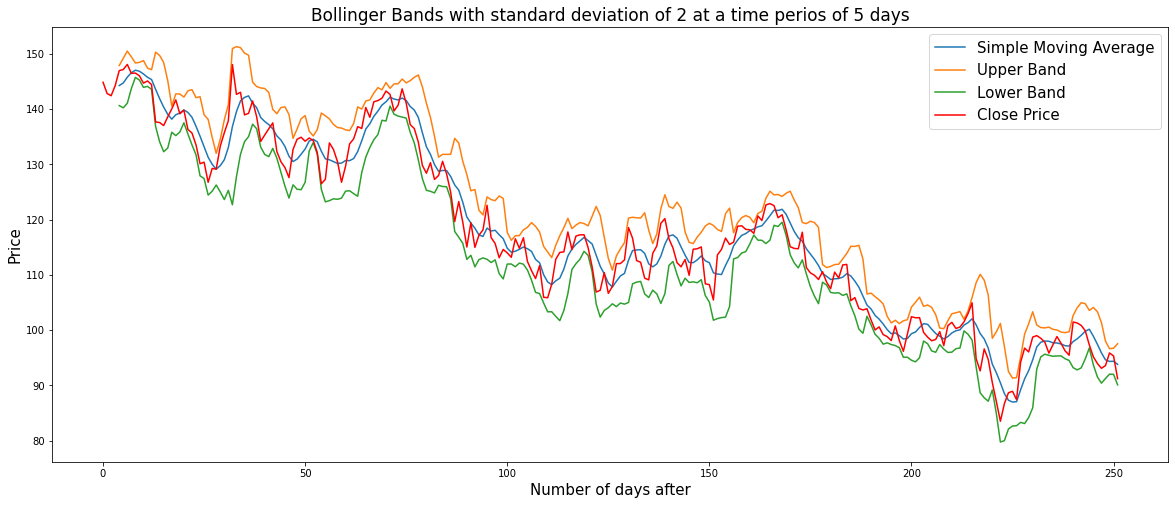

In [10]:
import matplotlib.pyplot as plt 


# Uncomment for interactive graphs
# %matplotlib notebook

plt.figure(figsize=(20, 8))
plt.plot(close_avg, label='Simple Moving Average')
plt.plot(upper_bollinger_band, label='Upper Band')
plt.plot(lower_bollinger_band, label='Lower Band')
plt.plot(close_prices, 'r', label='Close Price')
plt.title(r"Bollinger Bands with standard deviation of 2 at a time perios of 5 days", fontsize=17)
plt.xlabel("Number of days after", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.legend(prop = {'size' : 15})
plt.savefig("graphed-results/SMA + Bollinger Bands")
plt.show()

### end

## OBV :- On Balance Volume

In [11]:
volumes = df['Volume'].to_list()

In [12]:
on_balance_volumes = []
obv = 0

on_balance_volumes.append(obv)

for i in range(1, len(volumes)):
    if close_prices[i] > close_prices[i - 1]:
        obv += volumes[i]
        on_balance_volumes.append(obv)
        
    elif close_prices[i] < close_prices[i - 1]:
        obv -= volumes[i]
        on_balance_volumes.append(obv)
        
    else:
        obv += 0
        on_balance_volumes.append(obv)   
    

In [13]:
NUM_OF_DAYS_2 = 5
obv_df = pd.DataFrame(on_balance_volumes)
obv_sma = obv_df.rolling(NUM_OF_DAYS_2).mean()

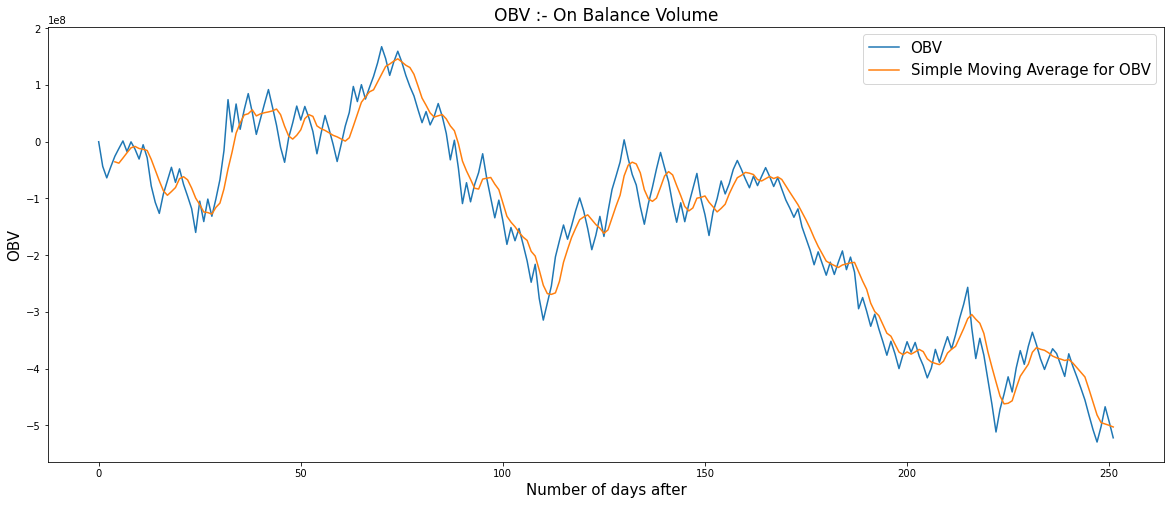

In [14]:
plt.figure(figsize=(20, 8))
plt.plot(on_balance_volumes, label='OBV')
plt.plot(obv_sma, label='Simple Moving Average for OBV')
plt.title("OBV :- On Balance Volume", fontsize=17)
plt.xlabel("Number of days after", fontsize=15)
plt.ylabel("OBV", fontsize=15)
plt.legend(prop = {'size' : 15})
plt.savefig("graphed-results/SMA(OBV) + OBV")
plt.show()

## Implementing MACD (Moving Average Convergence Divergence)

### Equation for MACD 
MACD=12-Period EMA − 26-Period EMA

In [15]:
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()

macd = ema12 - ema26

# Signal line of macd
signal = macd.ewm(span=9, adjust=False).mean()

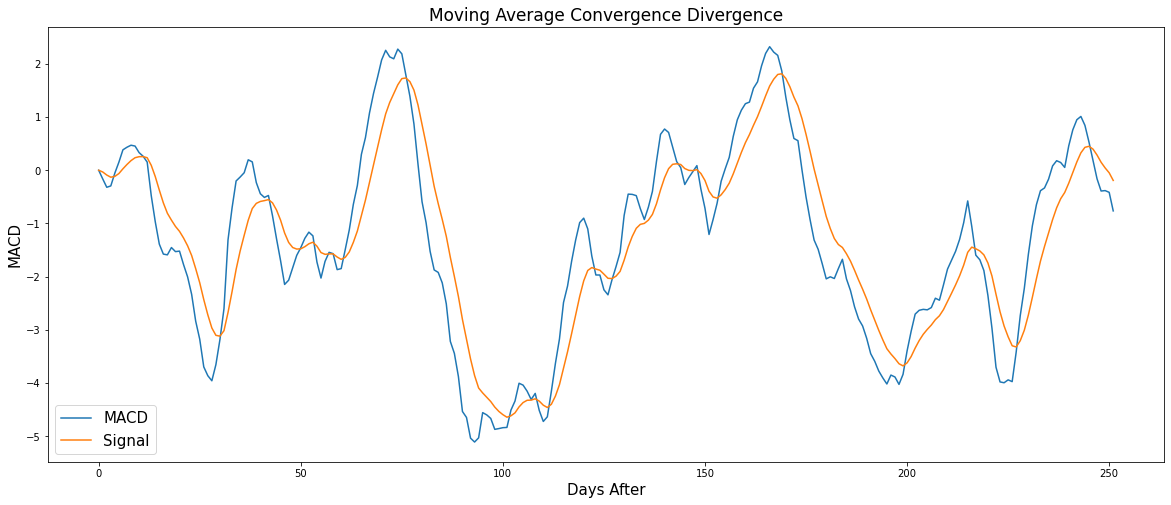

In [16]:
plt.figure(figsize=(20, 8))
plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal')
plt.title("Moving Average Convergence Divergence", fontsize=17)
plt.ylabel("MACD", fontsize=15)
plt.xlabel("Days After", fontsize=15)
plt.legend(prop = {'size' : 15}, loc = 'lower left')
plt.savefig("graphed-results/MACD")
plt.show()

## Resistance and Support Lines

In [17]:
high_prices = df['High'].to_list()
low_prices = df['Low'].to_list()

### Computing the pivots Using the equation Pivot Point = (Previous Session High + Previous Session Low + Previous Session Close)/3

In [18]:
pivot_points = []

for i in range(len(close_prices)):
    if i == 0:
        pivot_points.append(float("nan"))
    else:
        prev_high = high_prices[i-1]
        prev_low = low_prices[i-1]
        prev_close = close_prices[i-1]
        
        pivot_point = (prev_high + prev_low + prev_close) / 3
        pivot_points.append(pivot_point)

### Computing the Resistance and Support levels using the equations below -


##### Resistance Level 1 = (2 x Pivot Point) – Previous Session Low
##### Support Level 1 – (2 x Pivot Point) – Previous High
##### Resistance Level 2 = (Pivot Point – Support Level 1) + Resistance Level 1 
##### Support Level 2 = Pivot Point – (Resistance Level 1 – Support Level 1) 
##### Resistance Level 3 = (Pivot Point – Support Level 2) + Resistance Level 2 
##### Support Level 3 = Pivot Point – (Resistance Level 2 – Support Level 2) 

In [19]:
resistance_1 = []
support_1 = []
resistance_2 = []
support_2 = []


for i in range(len(pivot_points)):
    if i == 0:
        resistance_1.append(float("nan"))
        support_1.append(float("nan"))
    else:
        r1 = (2 * pivot_points[i]) - low_prices[i-1]
        s1 = (2 * pivot_points[i]) - high_prices[i-1]
        
        r2 = (pivot_points[i] - s1) + r1
        s2 = pivot_points[i] - (r1 - s1)
        
        resistance_1.append(r1)
        support_1.append(s1)
        resistance_2.append(r2)
        support_2.append(s2)

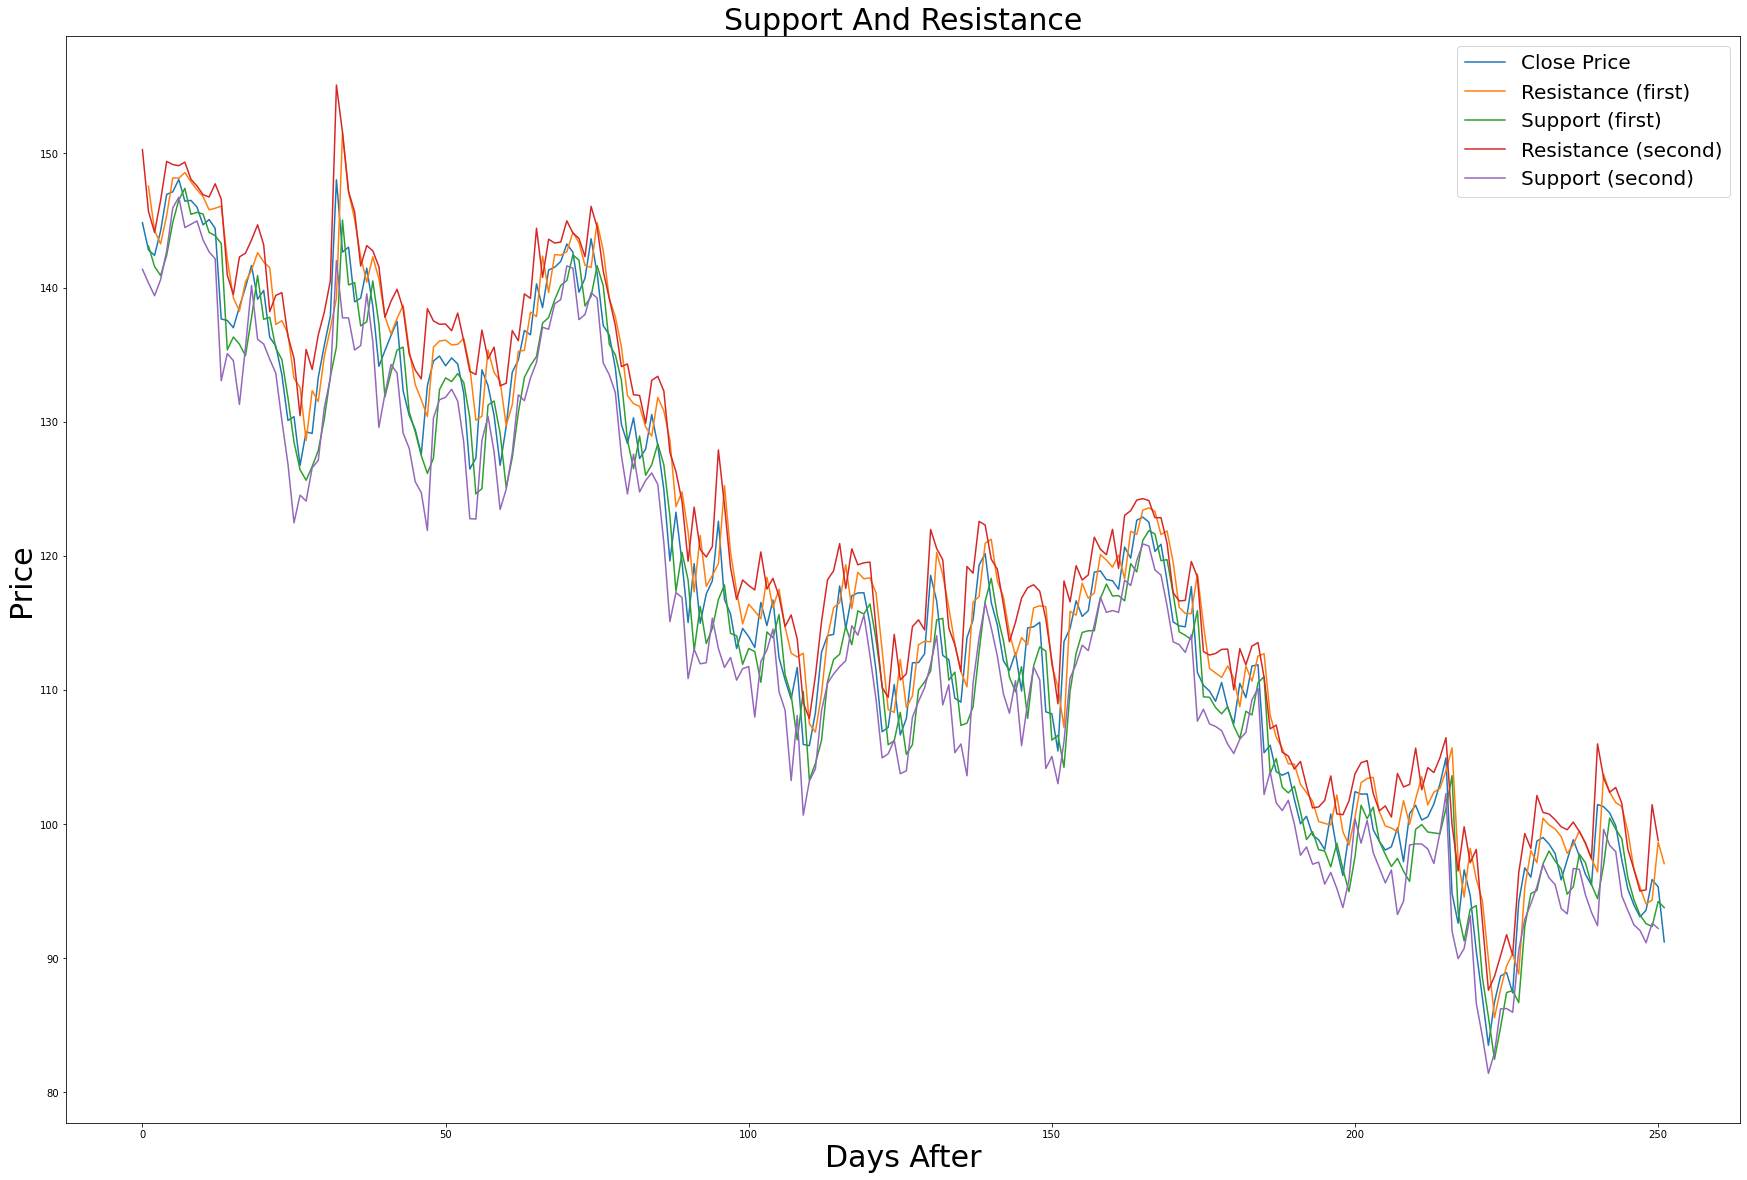

In [26]:
plt.figure(figsize=(30, 20))
plt.plot(close_prices, label='Close Price')
plt.plot(resistance_1, label='Resistance (first)')
plt.plot(support_1, label='Support (first)')
plt.plot(resistance_2, label='Resistance (second)')
plt.plot(support_2, label='Support (second)')
plt.xlabel("Days After", fontsize=30)
plt.ylabel("Price", fontsize=30)
plt.title("Support And Resistance", fontsize=30)
plt.legend(prop = {'size' : 20})
plt.savefig("graphed-results/support and resistance")
plt.show()